In [1]:
import pandas as pd
import fastf1
session = fastf1.get_session(2019, 'Monza', 'Q')
session.load(telemetry=False, laps=False, weather=False)
vettel = session.get_driver('VET')
print(f"Pronto {vettel['FirstName']}?")

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /home/hakbro/.cache/fastf1.
	Size: 24.0 KB
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.0.6]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_control_messages. Loading data...
_api           INFO 	Fetching race control messages...
req            INFO 	Data has been written to cache!
core           INFO 	Finished loading data for 20 drivers: ['16', '44', '77', '5', '3', '27', '55', '23', '18', '7', '99', '20', '26', '4', '10', '8', '11', '63', '88', '33']


Pronto Sebastian?


core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for c

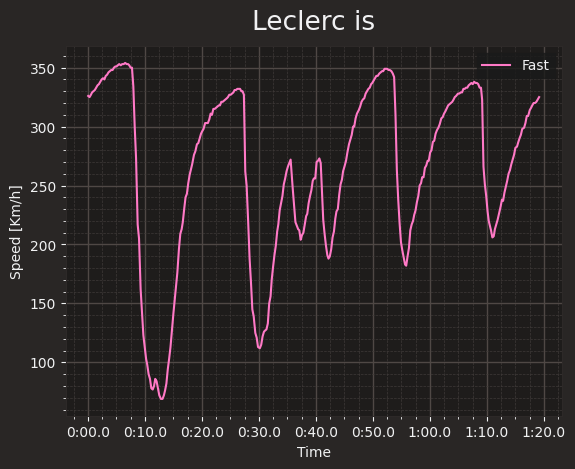

In [2]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

fastf1.plotting.setup_mpl()

session = fastf1.get_session(2019, 'Monza', 'Q')

session.load()
fast_leclerc = session.laps.pick_driver('LEC').pick_fastest()
lec_car_data = fast_leclerc.get_car_data()
t = lec_car_data['Time']
vCar = lec_car_data['Speed']

# The rest is just plotting
fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

In [2]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

fastf1.plotting.setup_mpl()

session = fastf1.get_session(2023, 'Silverstone', 'R')
session.load()


fast_leclerc = session.laps





logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...


req            INFO 	Data has been written to cache!
core           INFO 	Loading data for British Grand Prix - Race [v3.0.6]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data foun

In [11]:
sai = session.car_data['55']
sai
nor = session.get_telemetry()
nor

AttributeError: 'Session' object has no attribute 'get_telemetry'

In [4]:
df_laps = session.laps

sai_laps = df_laps[(df_laps['DriverNumber'] == '55') & (df_laps['LapNumber'] >= 5) & (df_laps['LapNumber'] <= 6)]

sai_laps

time_range = (
    sai_laps['LapStartDate'].iloc[0],
    sai_laps['LapStartDate'].iloc[1],
)
time_range

(Timestamp('2023-07-09 14:09:29.946000'),
 Timestamp('2023-07-09 14:11:03.612000'))

In [5]:
sai_lap_17 = sai[(sai['Date']>= time_range[0]) & (sai['Date']<= time_range[1])].copy()
sai_lap_17
sai_lap_17['new_brake'] = sai_lap_17['Brake'].apply(lambda x: int(x)*100)
sai_lap_17['new_drs'] = sai_lap_17['DRS']*10
sai_lap_17


nor_lap_17 = nor[(nor['Date']>= time_range[0]) & (nor['Date']<= time_range[1])].copy()
nor_lap_17
nor_lap_17['new_brake'] = nor_lap_17['Brake'].apply(lambda x: int(x)*100)
nor_lap_17['new_drs'] = nor_lap_17['DRS']*10
nor_lap_17


,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,new_brake,new_drs
15164,2023-07-09 14:09:30.232,11878,298,7,89,False,0,car,0 days 01:08:29.196000,0 days 01:08:29.196000,0,0
15165,2023-07-09 14:09:30.432,11869,297,7,89,False,0,car,0 days 01:08:29.396000,0 days 01:08:29.396000,0,0
15166,2023-07-09 14:09:30.712,11830,295,7,90,False,0,car,0 days 01:08:29.676000,0 days 01:08:29.676000,0,0
15167,2023-07-09 14:09:30.992,11782,294,7,93,False,0,car,0 days 01:08:29.956000,0 days 01:08:29.956000,0,0
15168,2023-07-09 14:09:31.152,11745,294,7,100,False,0,car,0 days 01:08:30.116000,0 days 01:08:30.116000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15499,2023-07-09 14:11:02.032,11499,287,7,100,False,0,car,0 days 01:10:00.996000,0 days 01:10:00.996000,0,0
15500,2023-07-09 14:11:02.433,11613,291,7,100,False,0,car,0 days 01:10:01.397000,0 days 01:10:01.397000,0,0
15501,2023-07-09 14:11:02.673,11711,293,7,100,False,0,car,0 days 01:10:01.637000,0 days 01:10:01.637000,0,0
15502,2023-07-09 14:11:02.913,11711,294,7,100,False,0,car,0 days 01:10:01.877000,0 days 01:10:01.877000,0,0


In [9]:
nor_lap_17.add_distance()

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,new_brake,new_drs,Distance
15164,2023-07-09 14:09:30.232,11878,298,7,89,False,0,car,0 days 01:08:29.196000,0 days 01:08:29.196000,0,0,340150.113333
15165,2023-07-09 14:09:30.432,11869,297,7,89,False,0,car,0 days 01:08:29.396000,0 days 01:08:29.396000,0,0,340166.613333
15166,2023-07-09 14:09:30.712,11830,295,7,90,False,0,car,0 days 01:08:29.676000,0 days 01:08:29.676000,0,0,340189.557778
15167,2023-07-09 14:09:30.992,11782,294,7,93,False,0,car,0 days 01:08:29.956000,0 days 01:08:29.956000,0,0,340212.424444
15168,2023-07-09 14:09:31.152,11745,294,7,100,False,0,car,0 days 01:08:30.116000,0 days 01:08:30.116000,0,0,340225.491111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15499,2023-07-09 14:11:02.032,11499,287,7,100,False,0,car,0 days 01:10:00.996000,0 days 01:10:00.996000,0,0,345794.285278
15500,2023-07-09 14:11:02.433,11613,291,7,100,False,0,car,0 days 01:10:01.397000,0 days 01:10:01.397000,0,0,345826.699444
15501,2023-07-09 14:11:02.673,11711,293,7,100,False,0,car,0 days 01:10:01.637000,0 days 01:10:01.637000,0,0,345846.232778
15502,2023-07-09 14:11:02.913,11711,294,7,100,False,0,car,0 days 01:10:01.877000,0 days 01:10:01.877000,0,0,345865.832778


In [10]:
sai_lap_17.add_distance()

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,new_brake,new_drs,Distance
15164,2023-07-09 14:09:30.232,11753,258,6,100,False,0,car,0 days 01:08:29.196000,0 days 01:08:29.196000,0,0,294492.380000
15165,2023-07-09 14:09:30.432,10493,262,6,100,False,0,car,0 days 01:08:29.396000,0 days 01:08:29.396000,0,0,294506.935556
15166,2023-07-09 14:09:30.712,10738,266,7,100,False,0,car,0 days 01:08:29.676000,0 days 01:08:29.676000,0,0,294527.624444
15167,2023-07-09 14:09:30.992,10902,270,7,100,False,0,car,0 days 01:08:29.956000,0 days 01:08:29.956000,0,0,294548.624444
15168,2023-07-09 14:09:31.152,10971,270,7,100,False,0,car,0 days 01:08:30.116000,0 days 01:08:30.116000,0,0,294560.624444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15499,2023-07-09 14:11:02.032,11781,218,5,100,False,0,car,0 days 01:10:00.996000,0 days 01:10:00.996000,0,0,300179.729722
15500,2023-07-09 14:11:02.433,10510,227,5,100,False,0,car,0 days 01:10:01.397000,0 days 01:10:01.397000,0,0,300205.015000
15501,2023-07-09 14:11:02.673,10791,231,6,100,False,0,car,0 days 01:10:01.637000,0 days 01:10:01.637000,0,0,300220.415000
15502,2023-07-09 14:11:02.913,11012,238,6,100,False,0,car,0 days 01:10:01.877000,0 days 01:10:01.877000,0,0,300236.281667


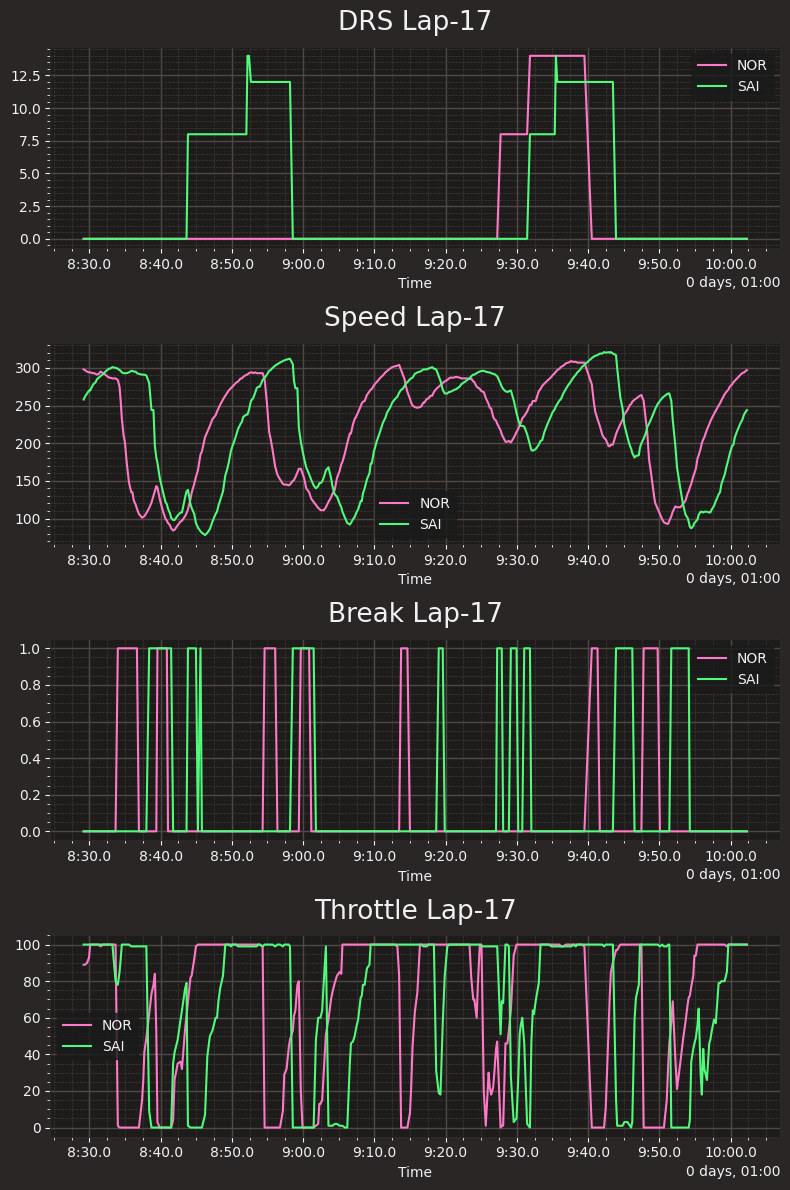

In [7]:
t = sai_lap_17['Time']

n_drs = nor_lap_17['DRS']
s_drs = sai_lap_17['DRS']

n_br = nor_lap_17['Brake']
s_br = sai_lap_17['Brake']

n_sp = nor_lap_17['Speed']
s_sp = sai_lap_17['Speed']

n_tr = nor_lap_17['Throttle']
s_tr = sai_lap_17['Throttle']


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 12))
# ===================
ax1.plot(t, n_drs, label='NOR')
ax1.plot(t, s_drs, label='SAI')
ax1.set_xlabel('Time')
ax1.set_title('DRS Lap-17')
ax1.legend() 
# ===================
ax2.plot(t, n_sp, label='NOR')
ax2.plot(t, s_sp, label='SAI')
ax2.set_xlabel('Time')
ax2.set_title('Speed Lap-17')
ax2.legend()

# ===================
ax3.plot(t, n_br, label='NOR')
ax3.plot(t, s_br, label='SAI')
ax3.set_xlabel('Time')
ax3.set_title('Break Lap-17')
ax3.legend()

# ===================
ax4.plot(t, n_tr, label='NOR')
ax4.plot(t, s_tr, label='SAI')
ax4.set_xlabel('Time')
ax4.set_title('Throttle Lap-17')
ax4.legend()


plt.tight_layout()  # To avoid overlapping labels and titles

plt.show()



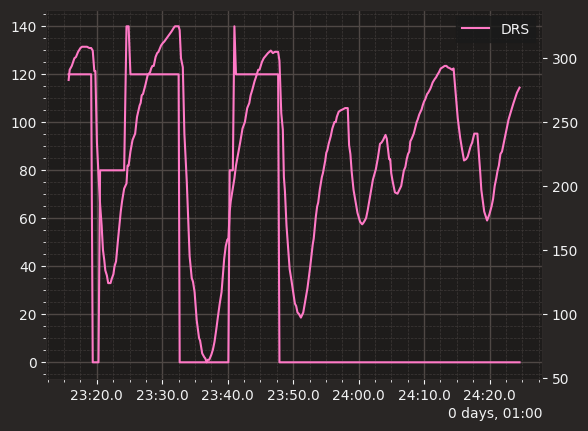

In [55]:

nDrs = sai_lap_17['new_drs']
sp = sai_lap_17['Speed']

fig, ax1 = plt.subplots()
ax1.plot(t, nDrs, label='DRS')
# ax.plot(t, sp, label='Speed')



ax2 = ax1.twinx()

# Plotting the second dataset on the right y-axis
ax2.plot(t, sp, label='Speed')


# ax.set_xlabel('Time')
# ax.set_title('LAP')
ax1.legend()
plt.show()